## Linear Regression on Historical Apple (AAPL) Stock Data

Here is implementation of linear regression operating on historical Apple stock data.

Dataset available through: https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
df = pd.read_csv(Path.cwd() / "HistoricalQuotes.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [4]:
# Remove whitespace in column names
renamed_cols = {col: col.strip() for col in df.columns}
df.rename(columns=renamed_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

df.dtypes

Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [6]:
# Set column Date as index
df.set_index("Date", inplace=True)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,$273.36,106721200,$257.26,$278.41,$256.37
2020-02-27,$273.52,80151380,$281.1,$286,$272.96
2020-02-26,$292.65,49678430,$286.53,$297.88,$286.5
2020-02-25,$288.08,57668360,$300.95,$302.53,$286.13
2020-02-24,$298.18,55548830,$297.26,$304.18,$289.23


In [7]:
# Strip '$' from data and convert to float
for col in df.columns:
    if col == "Volume":
        continue
    df[col] = df[col].apply(lambda x: float(x.replace("$", "")))

df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37
2020-02-27,273.52,80151380,281.10,286.00,272.96
2020-02-26,292.65,49678430,286.53,297.88,286.50
2020-02-25,288.08,57668360,300.95,302.53,286.13
2020-02-24,298.18,55548830,297.26,304.18,289.23


In [8]:
df.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

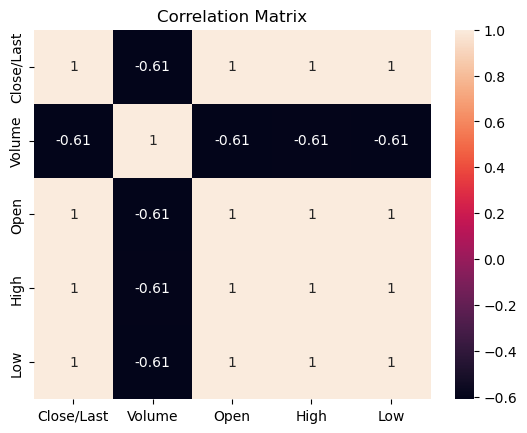

In [9]:
# Plot the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

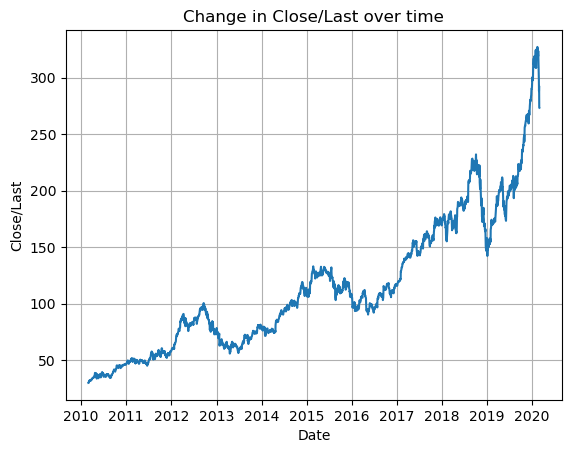

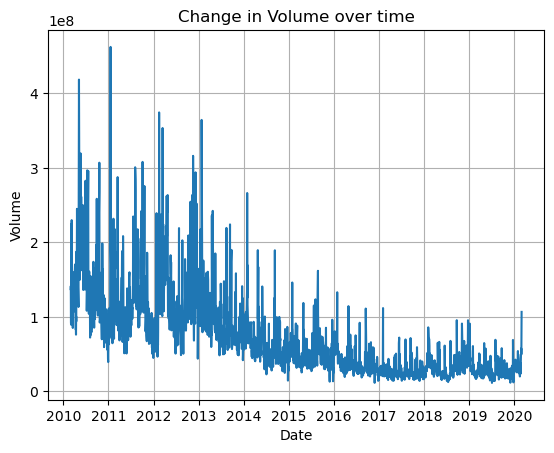

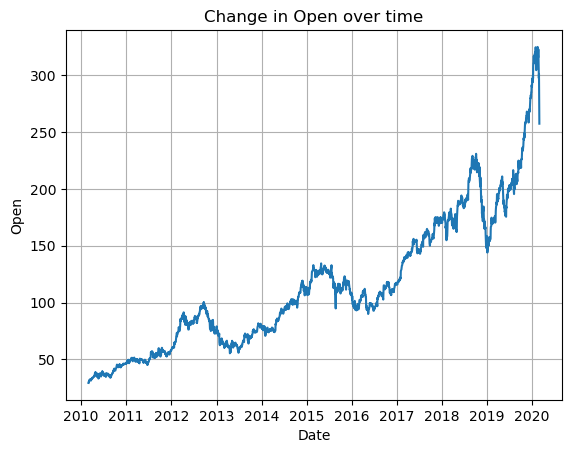

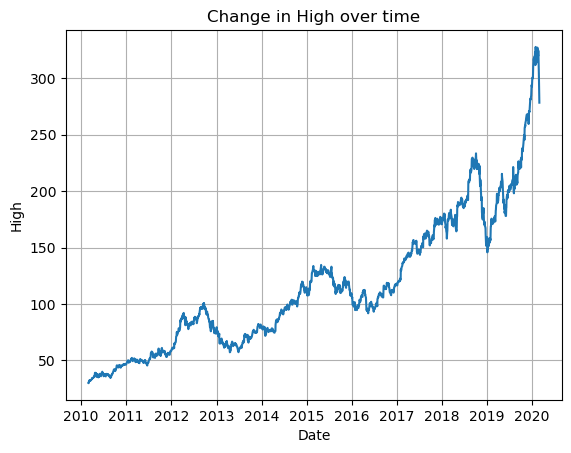

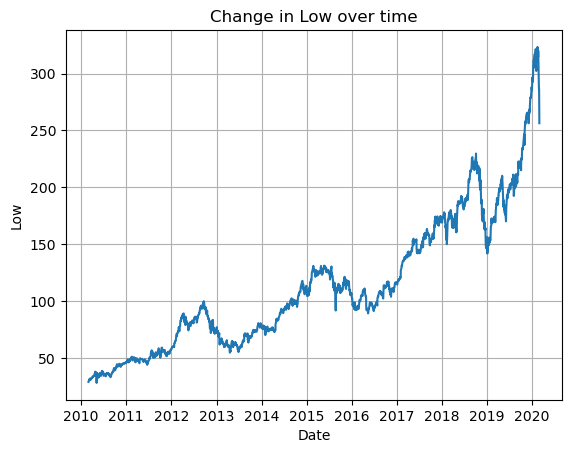

In [10]:
# Plot change in different parameters over time
for col in df.columns:
    plt.plot(df.index, df[col])
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.title(f"Change in {col} over time")
    plt.grid(True)
    plt.show()

In [11]:
# Set next day's closing price as training label

df['label'] = df["Close/Last"].shift(-1)
df.dropna(inplace=True)

df.head()

,Close/Last,Volume,Open,High,Low,label
Date,,,,,,
2020-02-28,273.36,106721200,257.26,278.41,256.37,273.52
2020-02-27,273.52,80151380,281.10,286.00,272.96,292.65
2020-02-26,292.65,49678430,286.53,297.88,286.50,288.08
2020-02-25,288.08,57668360,300.95,302.53,286.13,298.18
2020-02-24,298.18,55548830,297.26,304.18,289.23,313.05


### Case 1: Considering all 5 features for training

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data for training
X = df.drop("label", axis=1)
y = df["label"]

# Split for training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features with standard scalar
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make prediction and compute mean squared error
y_pred = lr_model.predict(X_test_scaled)
mse_all_features = mean_squared_error(y_test, y_pred)

mse_all_features

1.6093404739158554

### Case 2: Using PCA to reduce to 3 features only

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [8.85749579e-01 1.14131252e-01 6.93919701e-05]


In [15]:
# Fit the PCA model
lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# Make prediction and compute mean squared error
y_pred = lr_pca_model.predict(X_test_pca)
mse_reduced_features = mean_squared_error(y_test, y_pred)

mse_reduced_features

1.596360310841429

In [16]:
print(f"MSE with use of all 5 features = {mse_all_features}")
print(f"MSE with use of PCA (3 features) = {mse_reduced_features}")
print(f"Difference = {mse_all_features - mse_reduced_features}")
print("Hence we observe low difference between use of all features and PCA approach; with latter approach being slightly better.")

MSE with use of all 5 features = 1.6093404739158554
MSE with use of PCA (3 features) = 1.596360310841429
Difference = 0.012980163074426398
Hence we observe low difference between use of all features and PCA approach; with latter approach being slightly better.
